In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement, combinations
import libpysal.weights as lpw

In [16]:
import SARfunctions as sf

# Exponential Covariance Function

## 1. Generate $ Y_1, Y_j $ using SAR

In [17]:
# set seed
seed_value = 42
np.random.seed(seed_value)

In [18]:
# make coordinates
N = 20
coords = sf.make_coords(N, 0, 10, 0, 10)

In [19]:
# simulation
# set up parameters
n = 1000
threshold = 5
rho = 0.5 

result = sf.simulation(n, coords, N, threshold, rho)[0]

print("The shape of the simulation result is: ", np.shape(result))

The shape of the simulation result is:  (1000, 20, 1)


In [20]:
# convert results into dataframe (n, N) 
simul_df = sf.results_to_df(result)

print(simul_df)

           y1        y2        y3        y4        y5        y6        y7   
0   -0.176288 -1.504306  0.481104 -1.462833 -0.041076 -2.024568 -1.640802  \
1   -0.439835  0.873265  1.254886  1.119476 -0.615585 -0.166956  0.361476   
2    0.014418  1.166561 -2.682814  0.644276  0.222437 -0.086963  0.365894   
3   -0.950054 -0.825683 -0.907350 -1.902917 -0.054202  0.042506 -0.152282   
4    0.090383  2.422114 -0.125786  0.348781  0.104855 -1.084625  1.284004   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.510051  0.901262  1.333514 -1.106363 -1.495458  2.175198 -0.108800   
996 -0.682179 -0.752077 -0.092792 -1.091957 -1.383892 -2.893773  1.302295   
997 -1.034458 -0.967970 -0.944507  0.677402 -0.781160 -1.318204  0.658460   
998  1.174818  1.169000  1.284296  0.781863  1.781559  0.654606  2.231683   
999 -0.450619 -0.983809  0.598200 -0.028223 -1.306345 -1.316398 -1.031751   

           y8        y9       y10       y11       y12       y13       y14  

## 2. Calculate Covariance using exponential function

$$ Cov[Y_i, Y_j|X] = \theta_1 exp(-\theta_2 ||X_i - X_j||) =exp(-\frac{1}{2}|X_i - X_j|^2) $$ 

In [21]:
# Calculate distances between coordinates
distances = sf.distances(coords)     
distances = sf.pairs_df(distances)

distances

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20
y1,0.000000,7.450502,4.795692,3.324077,2.683653,2.789320,5.196502,5.012338,2.274072,6.564479,3.539818,7.411047,7.132085,3.740323,4.028633,2.741579,3.151788,5.356742,0.923808,1.908448
y2,7.450502,0.000000,2.667224,4.188226,8.554307,10.239555,8.946570,3.841578,5.721511,2.598694,10.412556,0.364876,1.397492,10.955879,11.285810,10.179372,6.672261,4.280060,7.522382,7.247871
y3,4.795692,2.667224,0.000000,1.525993,5.988481,7.581921,6.802250,2.594778,3.275535,2.468560,7.781907,2.671994,2.483167,8.374663,8.696385,7.533042,4.279334,2.841953,4.937233,4.649515
y4,3.324077,4.188226,1.525993,0.000000,4.516388,6.093904,5.656908,3.056665,2.260661,3.381047,6.263695,4.197380,3.813698,6.989825,7.299828,6.064909,3.008218,2.786677,3.589366,3.161611
y5,2.683653,8.554307,5.988481,4.516388,0.000000,3.291060,2.744636,7.125355,4.655111,6.874240,2.031921,8.625285,7.813097,4.960234,5.102151,3.533901,2.119180,5.142145,3.580415,1.361442
y6,2.789320,10.239555,7.581921,6.093904,3.291060,0.000000,5.936323,7.601100,4.850662,9.222286,2.233578,10.199289,9.880087,1.731345,1.822954,0.359241,5.029089,7.801582,2.938335,3.705801
y7,5.196502,8.946570,6.802250,5.656908,2.744636,5.936323,0.000000,8.671574,6.701704,6.678047,4.095913,9.122921,7.859739,7.649268,7.758891,6.214899,2.675939,4.776901,6.120213,3.349431
y8,5.012338,3.841578,2.594778,3.056665,7.125355,7.601100,8.671574,0.000000,2.763504,4.937799,8.507244,3.590229,4.504478,7.851270,8.198148,7.434440,5.997587,5.386015,4.663220,5.797001
y9,2.274072,5.721511,3.275535,2.260661,4.655111,4.850662,6.701704,2.763504,0.000000,5.563423,5.807277,5.603581,5.758682,5.274640,5.613336,4.702453,4.134764,5.006004,1.924815,3.452723
y10,6.564479,2.598694,2.468560,3.381047,6.874240,9.222286,6.678047,4.937799,5.563423,0.000000,8.873933,2.897465,1.257534,10.296314,10.591654,9.251161,4.792987,1.903378,6.949914,5.733758


In [22]:
cov_model = np.exp(-1/2*(distances**2))
cov_model

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20
y1,1.000000e+00,8.834095e-13,1.013688e-05,3.986886e-03,2.729648e-02,2.044221e-02,1.368470e-06,3.503433e-06,7.534321e-02,4.391442e-10,1.901415e-03,1.184370e-12,9.004297e-12,9.164450e-04,2.990378e-04,2.332739e-02,6.964820e-03,5.875287e-07,6.526526e-01,1.618497e-01
y2,8.834095e-13,1.000000e+00,2.852304e-02,1.552274e-04,1.288243e-16,1.707809e-23,4.161904e-18,6.243122e-04,7.789986e-08,3.416326e-02,2.861604e-24,9.355999e-01,3.766300e-01,8.620618e-27,2.198176e-28,3.157079e-23,2.151823e-10,1.052199e-04,5.157694e-13,3.916531e-12
y3,1.013688e-05,2.852304e-02,1.000000e+00,3.121327e-01,1.631872e-08,3.289862e-13,8.963281e-11,3.451239e-02,4.679491e-03,4.750623e-02,7.079171e-14,2.816214e-02,4.581884e-02,5.893644e-16,3.782513e-17,4.759990e-13,1.055475e-04,1.762657e-02,5.090510e-06,2.021680e-05
y4,3.986886e-03,1.552274e-04,3.121327e-01,1.000000e+00,3.721201e-05,8.631630e-09,1.125008e-07,9.357284e-03,7.766944e-02,3.293718e-03,3.023233e-09,1.493826e-04,6.946205e-04,2.458645e-11,2.683908e-12,1.029546e-08,1.083810e-02,2.059341e-02,1.593578e-03,6.752158e-03
y5,2.729648e-02,1.288243e-16,1.631872e-08,3.721201e-05,1.000000e+00,4.446948e-03,2.313256e-02,9.446854e-12,1.969725e-05,5.478596e-11,1.269005e-01,7.001885e-17,5.550848e-14,4.542840e-06,2.224513e-06,1.941629e-03,1.058787e-01,1.812453e-06,1.645539e-03,3.958332e-01
y6,2.044221e-02,1.707809e-23,3.289862e-13,8.631630e-09,4.446948e-03,1.000000e+00,2.227129e-08,2.844092e-13,7.776064e-06,3.400206e-19,8.254313e-02,2.577203e-23,6.352280e-22,2.234032e-01,1.898387e-01,9.375108e-01,3.220833e-06,6.072965e-14,1.334107e-02,1.042139e-03
y7,1.368470e-06,4.161904e-18,8.963281e-11,1.125008e-07,2.313256e-02,2.227129e-08,1.000000e+00,4.691954e-17,1.767259e-10,2.070309e-10,2.275252e-04,8.459390e-19,3.851410e-14,1.969846e-13,8.465449e-14,4.099153e-09,2.786668e-02,1.109082e-05,7.350477e-09,3.663478e-03
y8,3.503433e-06,6.243122e-04,3.451239e-02,9.357284e-03,9.446854e-12,2.844092e-13,4.691954e-17,1.000000e+00,2.196123e-02,5.076281e-06,1.924676e-16,1.588646e-03,3.926571e-05,4.116359e-14,2.544566e-15,9.955847e-13,1.545201e-08,5.020432e-07,1.896701e-05,5.043353e-08
y9,7.534321e-02,7.789986e-08,4.679491e-03,7.766944e-02,1.969725e-05,7.776064e-06,1.767259e-10,2.196123e-02,1.000000e+00,1.900765e-07,4.751453e-08,1.518976e-07,6.293213e-08,9.090074e-07,1.438103e-07,1.578372e-05,1.939060e-04,3.616382e-06,1.568515e-01,2.578236e-03
y10,4.391442e-10,3.416326e-02,4.750623e-02,3.293718e-03,5.478596e-11,3.400206e-19,2.070309e-10,5.076281e-06,1.900765e-07,1.000000e+00,7.950143e-18,1.503082e-02,4.535291e-01,9.535303e-24,4.362553e-25,2.604214e-19,1.026918e-05,1.634213e-01,3.247162e-11,7.262265e-08


In [23]:
# make it into one dataframe of calculated covariance & distances
column_pairs = list(combinations(cov_model.columns, 2))

cov_pairs = [(cov_model[yi][yj]) for yi, yj in column_pairs]
dis_pairs = [(distances[yi][yj]) for yi, yj in column_pairs]

data = pd.DataFrame({'Calculated Covariance':cov_pairs, 'Distances': dis_pairs}, index=column_pairs)
data

,Calculated Covariance,Distances
"(y1, y2)",8.834095e-13,7.450502
"(y1, y3)",1.013688e-05,4.795692
"(y1, y4)",3.986886e-03,3.324077
"(y1, y5)",2.729648e-02,2.683653
"(y1, y6)",2.044221e-02,2.789320
...,...,...
"(y17, y19)",3.285114e-04,4.005231
"(y17, y20)",3.957374e-01,1.361620
"(y18, y19)",2.197450e-08,5.938583
"(y18, y20)",1.856977e-04,4.145212


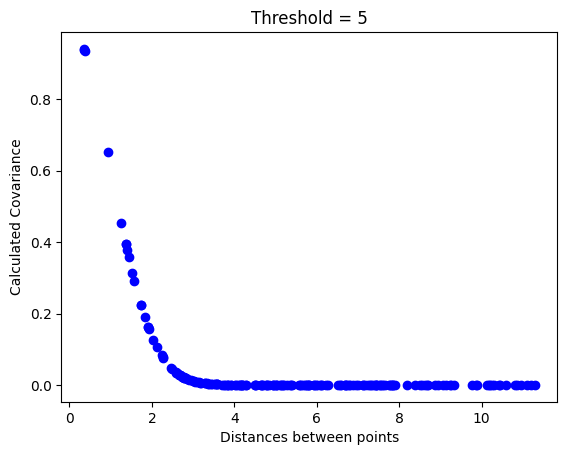

In [24]:
# plotting
plt.scatter(data['Distances'], data['Calculated Covariance'], c='blue')
# plt.yscale('log')
plt.ylabel('Calculated Covariance')
plt.xlabel('Distances between points')
plt.title('Threshold = ' + str(threshold))
plt.show()